In [2]:
# imports of library
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import random

In [3]:
# creating dataloaders
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,)),])
trainset = datasets.MNIST('PATH_TO_STORE_DATASET', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 17.9MB/s]


Extracting PATH_TO_STORE_DATASET/MNIST/raw/train-images-idx3-ubyte.gz to PATH_TO_STORE_DATASET/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 478kB/s]


Extracting PATH_TO_STORE_DATASET/MNIST/raw/train-labels-idx1-ubyte.gz to PATH_TO_STORE_DATASET/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.46MB/s]


Extracting PATH_TO_STORE_DATASET/MNIST/raw/t10k-images-idx3-ubyte.gz to PATH_TO_STORE_DATASET/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 7.62MB/s]

Extracting PATH_TO_STORE_DATASET/MNIST/raw/t10k-labels-idx1-ubyte.gz to PATH_TO_STORE_DATASET/MNIST/raw



In [4]:
# Function for applying 3D convolution with various activation functions
def conv3d(input_tensor, weight, bias=None, stride=1, padding=0, activation='relu'):
    output = F.conv3d(input_tensor, weight, bias, stride=stride, padding=padding)
    if activation == 'relu':
        return F.relu(output)
    elif activation == 'sigmoid':
        return torch.sigmoid(output)
    elif activation == 'tanh':
        return torch.tanh(output)
    elif activation == 'leaky_relu':
        return F.leaky_relu(output)
    else:
        return output

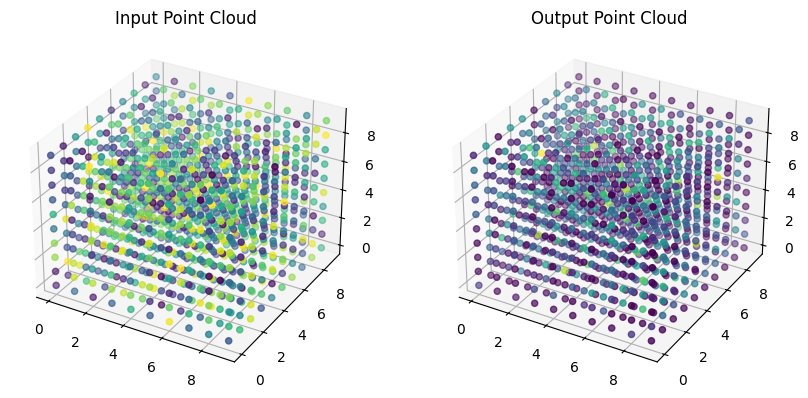

In [5]:
# Generate a random 3D point cloud for visualization
point_cloud = np.random.rand(1, 1, 10, 10, 10)
point_cloud_tensor = torch.tensor(point_cloud, dtype=torch.float32)

# Define a 3D convolutional kernel
kernel_size = 3
kernel = torch.randn(1, 1, kernel_size, kernel_size, kernel_size, requires_grad=True)

# Apply the 3D convolution
output = conv3d(point_cloud_tensor, kernel, padding=1)  # Example with padding
# Input point cloud
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121, projection='3d')
x,y,z = np.indices(point_cloud.shape[2:])
ax1.scatter(x,y,z, c=point_cloud[0,0])
ax1.set_title('Input Point Cloud')

# Output point cloud
ax2 = fig.add_subplot(122, projection='3d')
x,y,z = np.indices(output.detach().numpy().shape[2:])
ax2.scatter(x,y,z, c=output.detach().numpy()[0,0])
ax2.set_title('Output Point Cloud')
plt.show()

In [6]:
# show expected output shape
print("Input Point Cloud Shape:", point_cloud.shape)
print("Output Point Cloud Shape:", output.shape)

Input Point Cloud Shape: (1, 1, 10, 10, 10)
Output Point Cloud Shape: torch.Size([1, 1, 10, 10, 10])


In [7]:
# 2. 3D Pooling Function
def pool3d(input_tensor, kernel_size=2, stride=2, pooling_type='max'):
    if pooling_type == 'max':
        return F.max_pool3d(input_tensor, kernel_size, stride)
    elif pooling_type == 'avg':
        return F.avg_pool3d(input_tensor, kernel_size, stride)

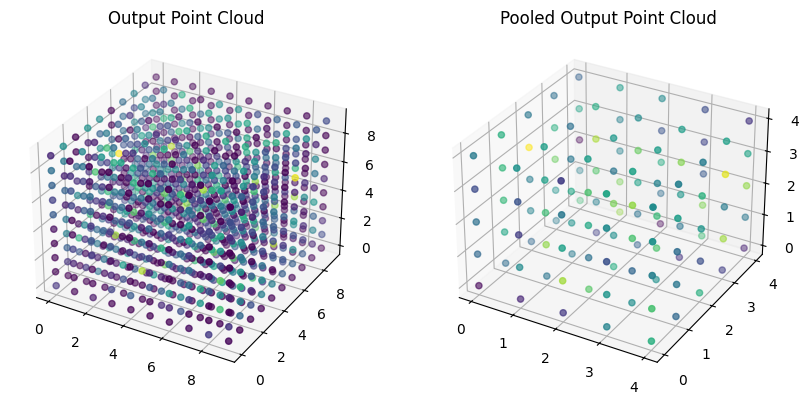

Pooled Output Shape: torch.Size([1, 1, 5, 5, 5])


In [8]:
pooled_output = pool3d(output, kernel_size=2, stride=2)

# Plot a single slice of the pooled output
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121, projection='3d')
x, y, z = np.indices(output.detach().numpy().shape[2:])
ax1.scatter(x,y,z, c=output.detach().numpy()[0,0])
ax1.set_title('Output Point Cloud')

ax2 = fig.add_subplot(122, projection='3d')
x, y, z = np.indices(pooled_output.detach().numpy().shape[2:])
ax2.scatter(x, y, z, c=pooled_output.detach().numpy()[0, 0])
ax2.set_title('Pooled Output Point Cloud')
plt.show()

print("Pooled Output Shape:", pooled_output.shape)


In [9]:
# 3. 3D Convolution Layer Function
class Conv3DLayer(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride=1, padding=0, activation='relu'):
        super(Conv3DLayer, self).__init__()
        self.conv = nn.Conv3d(in_channels, out_channels, kernel_size, stride, padding)
        self.activation = activation

    def forward(self, x):
        x = self.conv(x)
        if self.activation == 'relu':
            return F.relu(x)
        elif self.activation == 'sigmoid':
            return torch.sigmoid(x)
        elif self.activation == 'tanh':
            return torch.tanh(x)
        elif self.activation == 'leaky_relu':
            return F.leaky_relu(x)
        return x

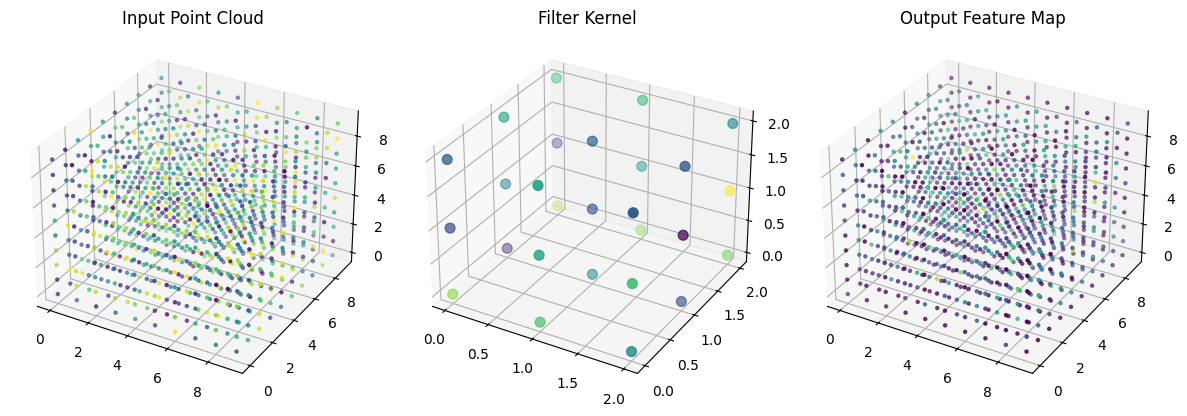

Input Point Cloud Shape: (1, 1, 10, 10, 10)
Kernel Shape: torch.Size([1, 1, 3, 3, 3])
Output Feature Map Shape: torch.Size([1, 1, 10, 10, 10])


In [10]:
# Display the input point cloud
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(131, projection='3d')
x, y, z = np.indices(point_cloud.shape[2:])
ax.scatter(x, y, z, c=point_cloud[0, 0], s=5)  # Reduced marker size for better visualization
ax.set_title('Input Point Cloud')

# Display the filter kernel
kernel_np = kernel.detach().numpy().squeeze()
ax = fig.add_subplot(132, projection='3d')
x, y, z = np.indices(kernel_np.shape)
ax.scatter(x, y, z, c=kernel_np, s=50)
ax.set_title('Filter Kernel')

# Display the output feature map
ax = fig.add_subplot(133, projection='3d')
output_np = output.detach().numpy().squeeze()
x, y, z = np.indices(output_np.shape)
ax.scatter(x, y, z, c=output_np, s=5) # Reduced marker size
ax.set_title('Output Feature Map')

plt.tight_layout()
plt.show()

print("Input Point Cloud Shape:", point_cloud.shape)
print("Kernel Shape:", kernel.shape)
print("Output Feature Map Shape:", output.shape)

In [11]:
# Define a 3D Pooling Layer class for reducing feature map dimensions
class Pool3DLayer(nn.Module):
    def __init__(self, kernel_size, stride, pooling_type='max', global_pool=False):
        super(Pool3DLayer, self).__init__()
        self.global_pool = global_pool
        self.pooling_type = pooling_type
        self.kernel_size = kernel_size
        self.stride = stride

    def forward(self, x):
        if self.global_pool:
            return F.adaptive_avg_pool3d(x, 1).view(x.size(0), -1)
        if self.pooling_type == 'max':
            # Adjust padding to ensure valid output size
            padding = (self.kernel_size - 1) // 2
            kernel_size_depth = min(self.kernel_size, x.shape[-1])
            stride_depth = min(self.stride, x.shape[-1])
            # Apply max pooling with adjusted parameters
            return F.max_pool3d(x, (self.kernel_size, self.kernel_size, kernel_size_depth),
                                 (self.stride, self.stride, stride_depth), padding=padding)
        else:
            return F.avg_pool3d(x, self.kernel_size, self.stride)

In [12]:
# 4. 3D Pooling Layer Function
class Pool3DLayer(nn.Module):
    def __init__(self, kernel_size, stride, pooling_type='max', global_pool=False):
        super(Pool3DLayer, self).__init__()
        self.global_pool = global_pool
        self.pooling_type = pooling_type
        self.kernel_size = kernel_size
        self.stride = stride

    def forward(self, x):
        if self.global_pool:
            return F.adaptive_avg_pool3d(x, 1).view(x.size(0), -1)
        if self.pooling_type == 'max':
            kernel_size_depth = min(self.kernel_size, x.shape[-1])
            stride_depth = min(self.stride, x.shape[-1])
            return F.max_pool3d(x, (self.kernel_size, self.kernel_size, kernel_size_depth),
                                 (self.stride, self.stride, stride_depth))
        else:
            return F.avg_pool3d(x, self.kernel_size, self.stride)

MAX Pooling:
Input Shape: torch.Size([1, 1, 10, 10, 10])
Output Shape: torch.Size([1, 1, 5, 5, 5])


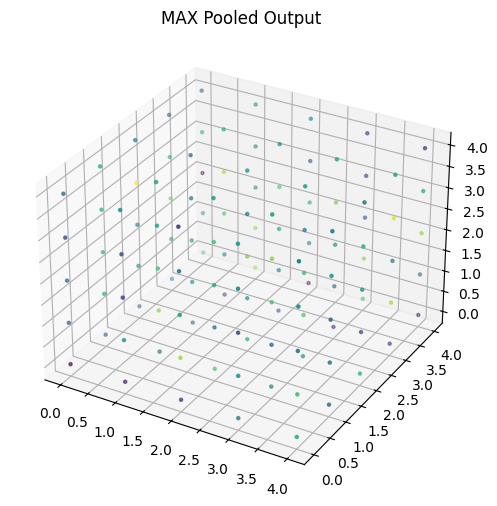

AVG Pooling:
Input Shape: torch.Size([1, 1, 10, 10, 10])
Output Shape: torch.Size([1, 1, 5, 5, 5])


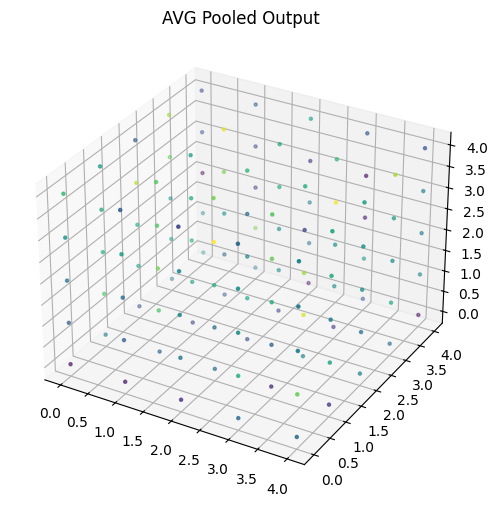

In [13]:
def verify_pooling(input_tensor, kernel_size=2, stride=2, pooling_types=['max', 'avg']):
    results = {}
    for pooling_type in pooling_types:
        pooled_output = pool3d(input_tensor, kernel_size, stride, pooling_type)
        results[pooling_type] = pooled_output

        print(f"{pooling_type.upper()} Pooling:")
        print("Input Shape:", input_tensor.shape)
        print("Output Shape:", pooled_output.shape)

        fig = plt.figure(figsize=(6, 6))
        ax = fig.add_subplot(111, projection='3d')
        x, y, z = np.indices(pooled_output.detach().numpy().shape[2:])
        ax.scatter(x, y, z, c=pooled_output.detach().numpy()[0, 0], s=5)  # Reduced marker size
        ax.set_title(f'{pooling_type.upper()} Pooled Output')
        plt.show()
    return results

pooled_results = verify_pooling(output)

In [14]:
# 5. MLP Classifier
class MLPClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size=10):
        super(MLPClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.softmax(self.fc2(x))
        return x

In [15]:
# 6. Complete 3D CNN Model
class CNN3D(nn.Module):
    def __init__(self):
        super(CNN3D, self).__init__()
        self.conv1 = Conv3DLayer(1, 16, kernel_size=5, padding=2)
        self.pool1 = Pool3DLayer(kernel_size=2, stride=2)
        self.conv2 = Conv3DLayer(16, 32, kernel_size=3, padding=1)
        self.pool2 = Pool3DLayer(kernel_size=2, stride=2)
        self.gap = Pool3DLayer(kernel_size=1, stride=1, global_pool=True)
        self.mlp = MLPClassifier(input_size=32, hidden_size=64)

    def forward(self, x):
        x = self.conv1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.pool2(x)
        x = self.gap(x)
        x = self.mlp(x)
        return x

In [16]:
def reshape_mnist_data(data):
    return data.view(-1, 1, 28, 28, 1)

model = CNN3D()
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs = reshape_mnist_data(inputs)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        if i % 200 == 199:  # Print every 200 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))
            running_loss = 0.0

print('Finished Training')

[1,   200] loss: 2.240
[1,   400] loss: 2.158
[1,   600] loss: 2.112
[1,   800] loss: 2.056
[2,   200] loss: 1.985
[2,   400] loss: 1.961
[2,   600] loss: 1.937
[2,   800] loss: 1.901
[3,   200] loss: 1.834
[3,   400] loss: 1.809
[3,   600] loss: 1.788
[3,   800] loss: 1.767
[4,   200] loss: 1.745
[4,   400] loss: 1.728
[4,   600] loss: 1.717
[4,   800] loss: 1.700
[5,   200] loss: 1.693
[5,   400] loss: 1.692
[5,   600] loss: 1.682
[5,   800] loss: 1.674
[6,   200] loss: 1.665
[6,   400] loss: 1.658
[6,   600] loss: 1.664
[6,   800] loss: 1.653
[7,   200] loss: 1.643
[7,   400] loss: 1.652
[7,   600] loss: 1.642
[7,   800] loss: 1.633
[8,   200] loss: 1.631
[8,   400] loss: 1.628
[8,   600] loss: 1.631
[8,   800] loss: 1.624
[9,   200] loss: 1.626
[9,   400] loss: 1.619
[9,   600] loss: 1.615
[9,   800] loss: 1.618
[10,   200] loss: 1.616
[10,   400] loss: 1.616
[10,   600] loss: 1.619
[10,   800] loss: 1.607
Finished Training


7th question

In [17]:
# Define valid parentheses pairs
BRACKETS = {'(': ')', '{': '}', '[': ']', '<': '>'}
# Generate a random sequence containing different types of parentheses
def generate_sequence(length=10):
    sequence = []
    stack = []
    balanced_count = 0

    for _ in range(length):
        if random.random() > 0.5 or not stack:
            char = random.choice(list(BRACKETS.keys()) + list("abcdefghijklmnopqrstuvwxyz0123456789,.!?"))
            sequence.append(char)
            if char in BRACKETS:
                stack.append(char)
        else:
            char = BRACKETS[stack.pop()]
            sequence.append(char)
            balanced_count += 1

    return "".join(sequence), balanced_count

In [18]:
# Convert sequence to numerical representation
def encode_sequence(seq, max_len):
    encoding = [ord(char) % 128 for char in seq]  # Normalize ASCII encoding
    padding = [0] * (max_len - len(seq))  # Padding to max length
    return encoding + padding

In [19]:
class ParenthesesDataset(Dataset):
    def __init__(self, num_samples=5000, seq_length=10):
        self.data = []
        self.labels = []
        self.seq_length = seq_length

        for _ in range(num_samples):
            seq, count = generate_sequence(seq_length)
            self.data.append(encode_sequence(seq, seq_length))
            self.labels.append(count)

        self.data = torch.tensor(self.data, dtype=torch.float32)
        self.labels = torch.tensor(self.labels, dtype=torch.float32)

    def __len__(self):
        return len(self.data)
    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

In [20]:
# Elmon Model
class ElmonNetwork(nn.Module):
    def __init__(self, input_size=20, hidden_size=32, output_size=1):
        super(ElmonNetwork, self).__init__()
        self.hidden_size = hidden_size
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.fc2(x)
        return x.squeeze()

In [21]:
#Lstm Model
class LSTMModel(nn.Module):
    def __init__(self, hidden_size=32):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size=1, hidden_size=hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        x = x.unsqueeze(-1)
        output, _ = self.lstm(x)
        output = self.fc(output[:, -1, :])
        return output.squeeze()


In [22]:
# Gru model
class GRUModel(nn.Module):
    def __init__(self, hidden_size=32):
        super(GRUModel, self).__init__()
        self.hidden_size = hidden_size
        self.gru = nn.GRU(input_size=1, hidden_size=hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        x = x.unsqueeze(-1)
        output, _ = self.gru(x)
        output = self.fc(output[:, -1, :])
        return output.squeeze()

In [23]:
# Baseline model
class BaselineModel(nn.Module):
    def __init__(self):
        super(BaselineModel, self).__init__()
        self.scale = nn.Parameter(torch.ones(1))

    def forward(self, x):
        return self.scale * torch.ones(x.shape[0])

In [24]:

# Training function
def train_model(model, train_loader, epochs=10, lr=0.001):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    for epoch in range(epochs):
        total_loss = 0
        for x_batch, y_batch in train_loader:
            optimizer.zero_grad()
            y_pred = model(x_batch)
            loss = criterion(y_pred, y_batch)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_loader):.4f}")

# Evaluation function
def evaluate_model(model, test_loader):
    model.eval()
    criterion = nn.MSELoss()
    total_loss = 0
    with torch.no_grad():
        for x_batch, y_batch in test_loader:
            y_pred = model(x_batch)
            loss = criterion(y_pred, y_batch)
            total_loss += loss.item()
    print(f"Test Loss: {total_loss / len(test_loader):.4f}")

# Main execution
if __name__ == "__main__":
    # Dataset and DataLoader
    dataset = ParenthesesDataset(num_samples=6000, seq_length=20)
    train_size = int(0.8 * len(dataset))
    test_size = len(dataset) - train_size
    train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

    # Train and evaluate models
    print("\nTraining Elmon Network model...")
    elmon_model = ElmonNetwork()
    train_model(elmon_model, train_loader, epochs=10)
    evaluate_model(elmon_model, test_loader)

    print("\nTraining LSTM model...")
    lstm_model = LSTMModel(hidden_size=32)
    train_model(lstm_model, train_loader, epochs=10)
    evaluate_model(lstm_model, test_loader)

    print("\nTraining GRU model...")
    gru_model = GRUModel(hidden_size=32)
    train_model(gru_model, train_loader, epochs=10)
    evaluate_model(gru_model, test_loader)

    print("\nTraining Baseline model...")
    baseline_model = BaselineModel()
    train_model(baseline_model, train_loader, epochs=10)
    evaluate_model(baseline_model, test_loader)


Training Elmon Network model...
Epoch 1, Loss: 21.6631
Epoch 2, Loss: 1.8147
Epoch 3, Loss: 1.4201
Epoch 4, Loss: 1.3601
Epoch 5, Loss: 1.3802
Epoch 6, Loss: 1.3064
Epoch 7, Loss: 1.3749
Epoch 8, Loss: 1.3039
Epoch 9, Loss: 1.3530
Epoch 10, Loss: 1.3449
Test Loss: 1.1292

Training LSTM model...
Epoch 1, Loss: 1.5607
Epoch 2, Loss: 1.1359
Epoch 3, Loss: 1.1312
Epoch 4, Loss: 1.1272
Epoch 5, Loss: 1.1251
Epoch 6, Loss: 1.1205
Epoch 7, Loss: 1.1194
Epoch 8, Loss: 1.1150
Epoch 9, Loss: 1.1122
Epoch 10, Loss: 1.1077
Test Loss: 1.0283

Training GRU model...
Epoch 1, Loss: 1.6287
Epoch 2, Loss: 1.1281
Epoch 3, Loss: 1.1261
Epoch 4, Loss: 1.1236
Epoch 5, Loss: 1.1239
Epoch 6, Loss: 1.1208
Epoch 7, Loss: 1.1185
Epoch 8, Loss: 1.1194
Epoch 9, Loss: 1.1119
Epoch 10, Loss: 1.1069
Test Loss: 1.0300

Training Baseline model...
Epoch 1, Loss: 1.3408
Epoch 2, Loss: 1.2478
Epoch 3, Loss: 1.1938
Epoch 4, Loss: 1.1649
Epoch 5, Loss: 1.1512
Epoch 6, Loss: 1.1454
Epoch 7, Loss: 1.1430
Epoch 8, Loss: 1.142

In [25]:
test_sequences = [
    "((a*2)+(5%7)",
    "#include<ios.h>",
    "main(){<}>",
    "main(){<}>}"
]

# Function to predict balanced parentheses count
def predict_count(model, seq, seq_length):
    encoded_seq = encode_sequence(seq, seq_length)
    encoded_seq = torch.tensor(encoded_seq, dtype=torch.float32).unsqueeze(0)
    with torch.no_grad():
        prediction = model(encoded_seq)
    return prediction.item()


In [26]:
seq_length = 20
for model_name, model in [("Elmon", elmon_model), ("LSTM", lstm_model), ("GRU", gru_model), ("Baseline", baseline_model)]:
    print(f"\nPredictions for {model_name} model:")
    for seq in test_sequences:
        padded_seq = seq + " " * (seq_length - len(seq)) # pad to same length
        prediction = predict_count(model, padded_seq, seq_length)
        print(f"Sequence: '{seq}' -> Predicted Balanced Pairs: {prediction:.2f}")


Predictions for Elmon model:
Sequence: '((a*2)+(5%7)' -> Predicted Balanced Pairs: 0.72
Sequence: '#include<ios.h>' -> Predicted Balanced Pairs: 1.12
Sequence: 'main(){<}>' -> Predicted Balanced Pairs: 0.97
Sequence: 'main(){<}>}' -> Predicted Balanced Pairs: 3.54

Predictions for LSTM model:
Sequence: '((a*2)+(5%7)' -> Predicted Balanced Pairs: 1.91
Sequence: '#include<ios.h>' -> Predicted Balanced Pairs: 1.60
Sequence: 'main(){<}>' -> Predicted Balanced Pairs: 1.49
Sequence: 'main(){<}>}' -> Predicted Balanced Pairs: 1.54

Predictions for GRU model:
Sequence: '((a*2)+(5%7)' -> Predicted Balanced Pairs: 1.29
Sequence: '#include<ios.h>' -> Predicted Balanced Pairs: 1.32
Sequence: 'main(){<}>' -> Predicted Balanced Pairs: 1.28
Sequence: 'main(){<}>}' -> Predicted Balanced Pairs: 1.29

Predictions for Baseline model:
Sequence: '((a*2)+(5%7)' -> Predicted Balanced Pairs: 1.51
Sequence: '#include<ios.h>' -> Predicted Balanced Pairs: 1.51
Sequence: 'main(){<}>' -> Predicted Balanced Pairs: